In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scinet3 import *
import scinet3.ed_oscillator as edo

/home/rasp/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rasp/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rasp/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rasp/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [4]:
def osc_eqn(A_0, delta_0, b, kappa, t):
    return np.real(A_0 * np.exp(-b / 2. * t) * np.exp(1 / 2. * np.sqrt(b**2 - 4 * kappa + 0.j) * t + 1.j * delta_0))

def gen_input(A_0, delta_0, b, kappa, tt_predicted):
    tt_in = np.linspace(0, 5, 50)
    in1 = np.array([osc_eqn(A_0, delta_0, b, kappa, tt_in) for _ in tt_predicted])
    in2 = np.reshape(tt_predicted, (-1, 1))
    out = in2 #dummy filler
    return [in1, in2, out]

In [34]:
t_sample=np.linspace(0, 5, 50)

In [35]:
data, states, _ = edo.oscillator_data(10, t_sample=t_sample, t_meas_interval=(0, 10))

In [36]:
observations, questions, answers = data

In [37]:
observations.shape, questions.shape, answers.shape

((10, 50), (10, 1), (10, 1))

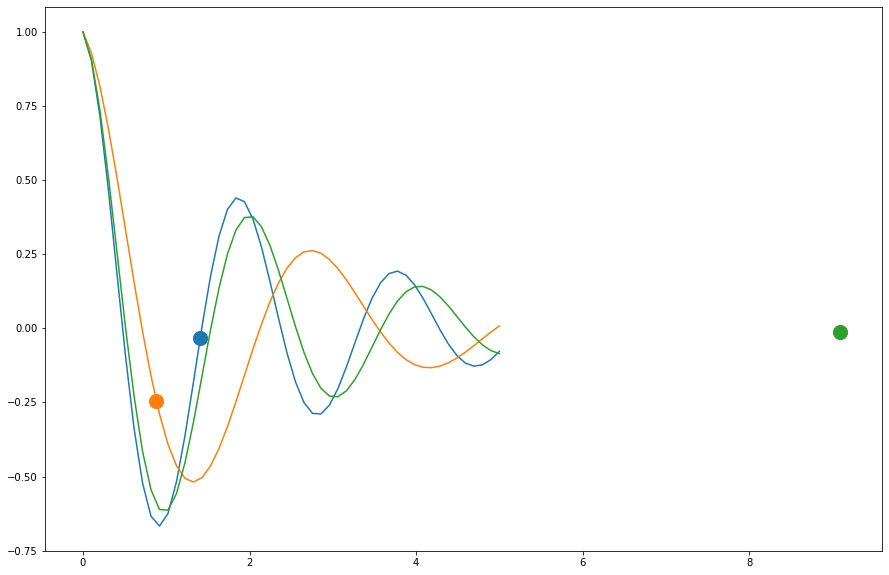

In [50]:
fig = plt.figure(figsize=(15, 10))
for i in range(0, 6, 2):
    plt.plot(t_sample, observations[i])
    plt.scatter(questions[i], answers[i], s=200)

In [30]:
questions[0], answers[0]

(array([9.04541267]), array([-0.06147832]))